In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("happiness_score_dataset .csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
x=df.drop(columns=["Happiness Score"])


In [6]:
y=df["Happiness Score"]

In [7]:
cat_features=['Country', 'Region', 'Happiness Rank']
numeric_features=['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
target=["Happiness Score"]

In [8]:
df["Country"].value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

Text(0.5, 1.0, 'regions')

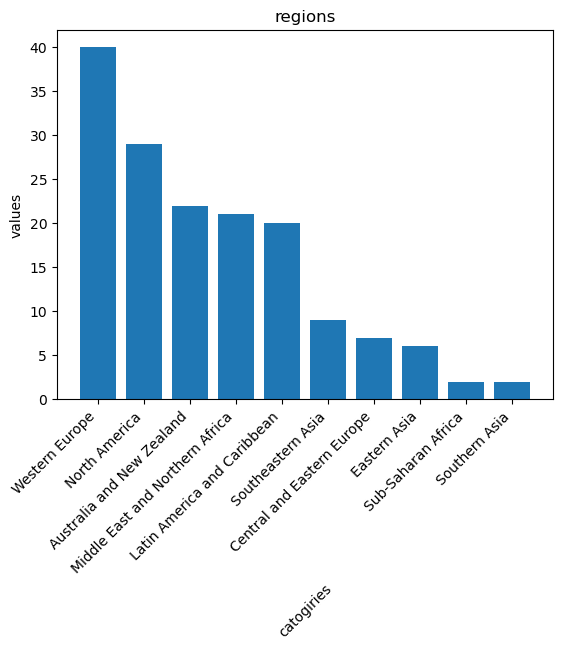

In [9]:
values=df["Region"].value_counts()
cates=df["Region"].unique()
plt.bar(cates,values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("catogiries",rotation=45)
plt.ylabel('values')
plt.title("regions")

In [10]:
df["Happiness Rank"].value_counts()

Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


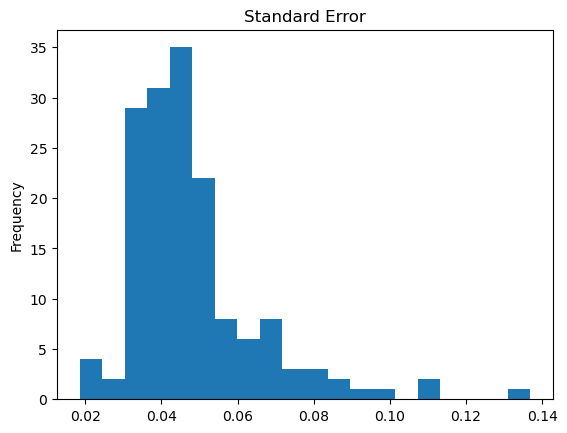

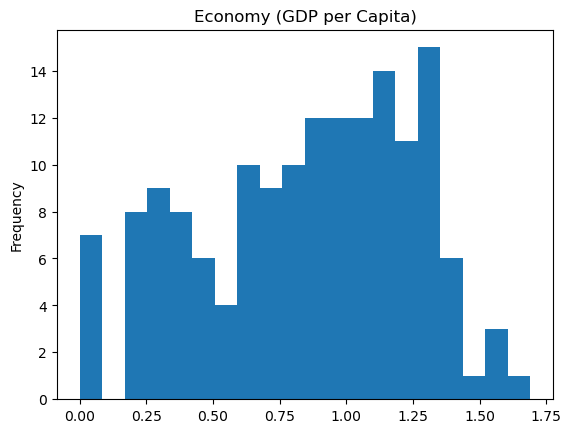

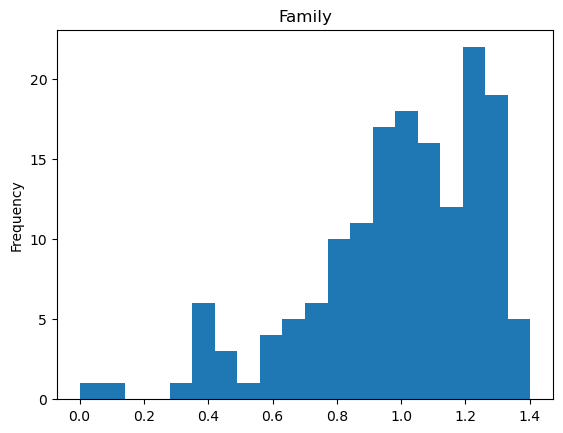

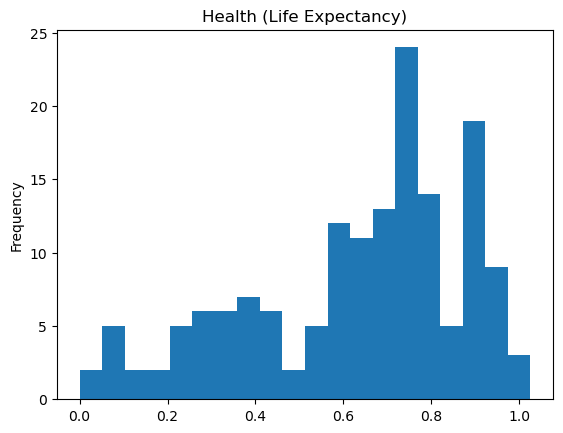

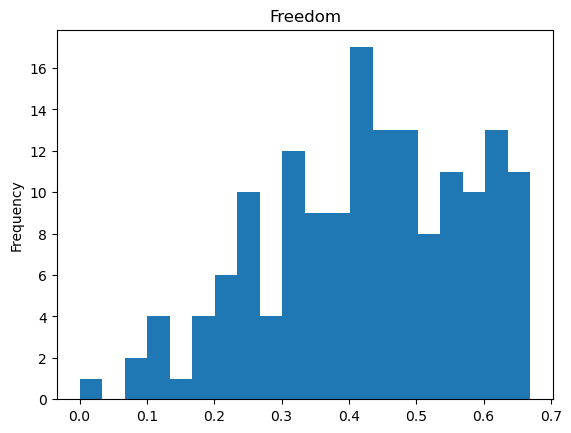

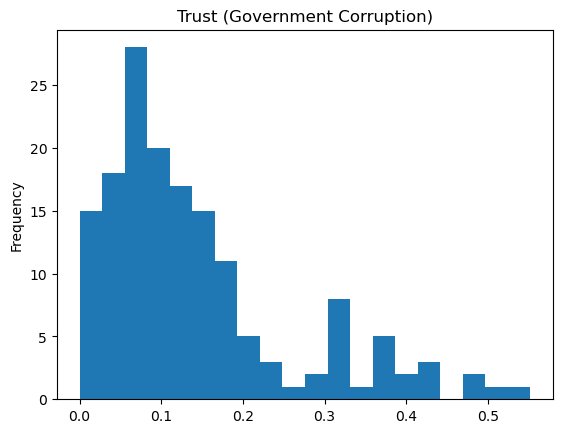

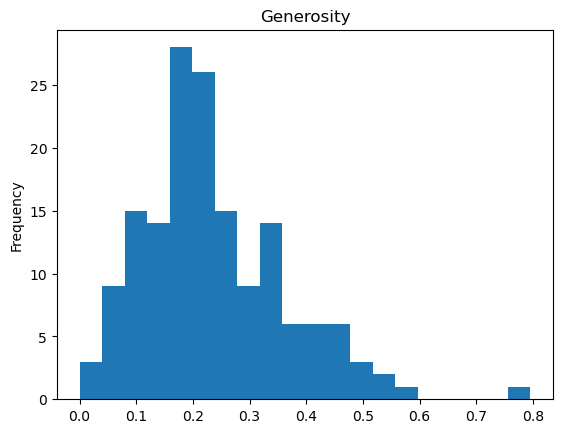

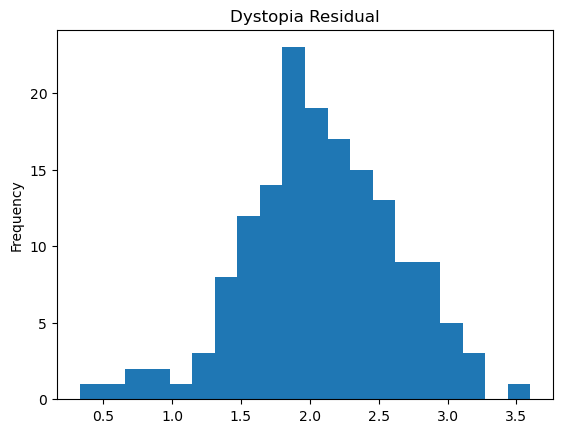

In [14]:
for x in numeric_features:
    df[x].plot(kind='hist',bins=20)
    plt.title(x)
    plt.show()

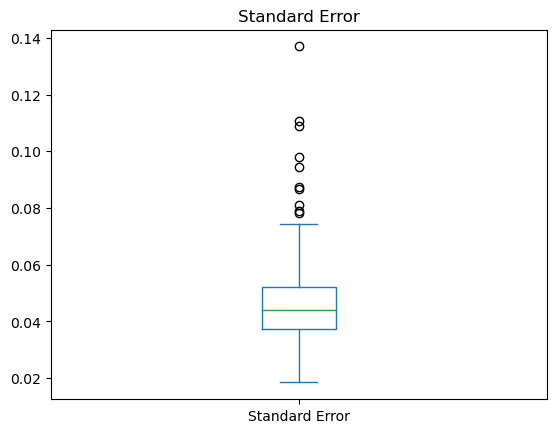

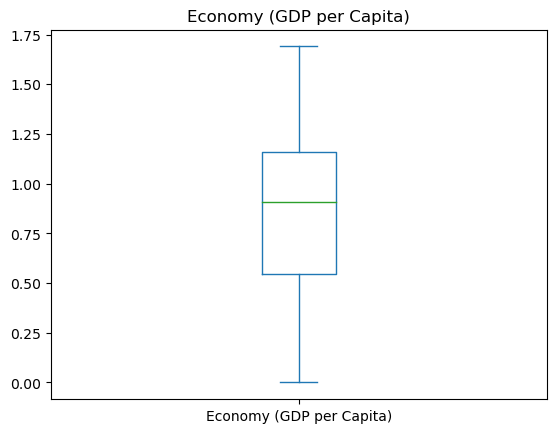

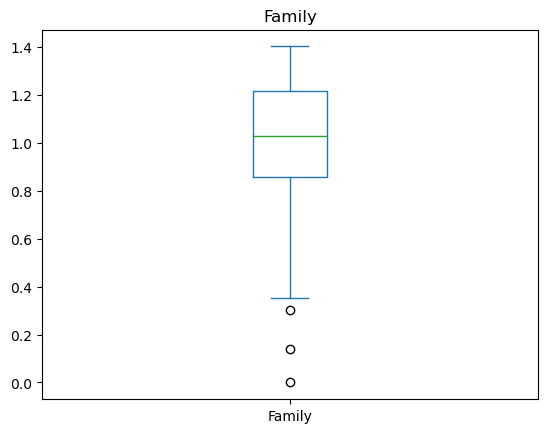

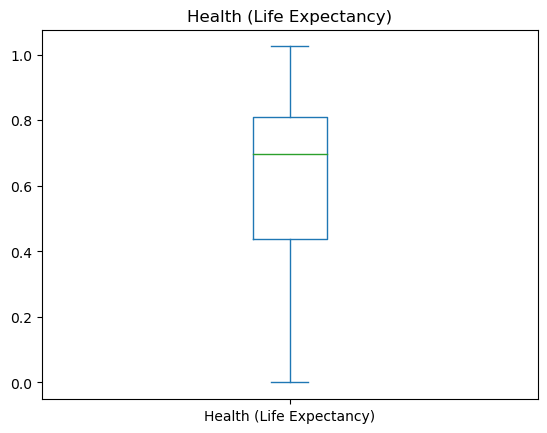

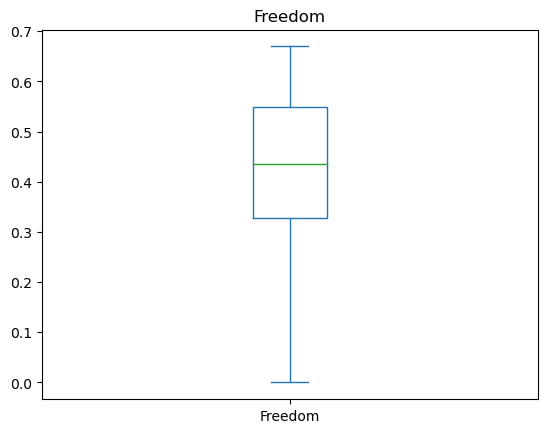

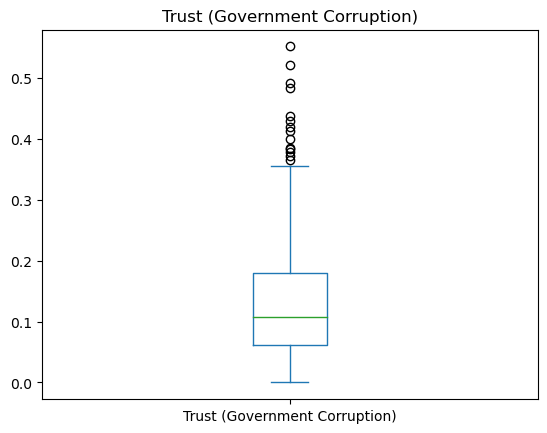

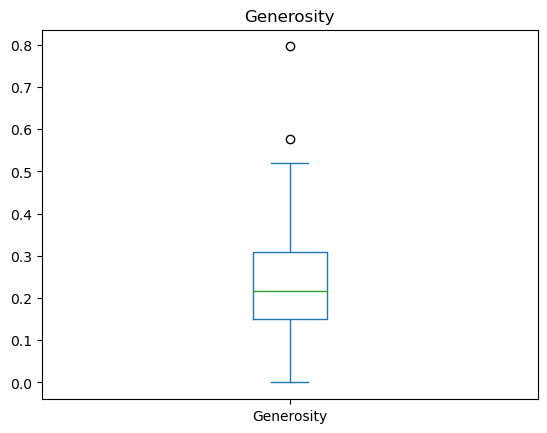

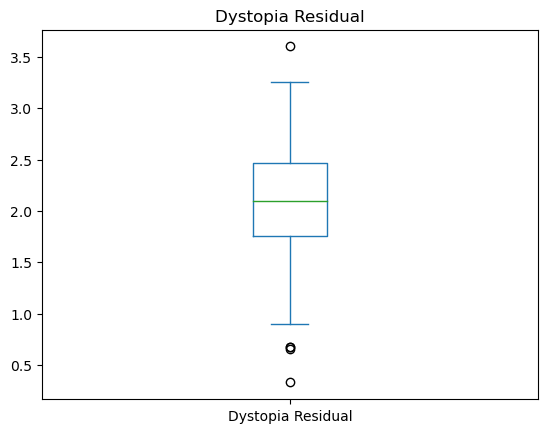

In [15]:
for x in numeric_features:
    df[x].plot(kind='box')
    plt.title(x)
    plt.show()

there is several approch to deal with this kind of dat 
1 with all the outlires in numeric column coz this dat is relevent and do not seems like outlires
2 with having cat column (encoding them)
3 without cat column i think those ar not releven

In [16]:
import seaborn as sns


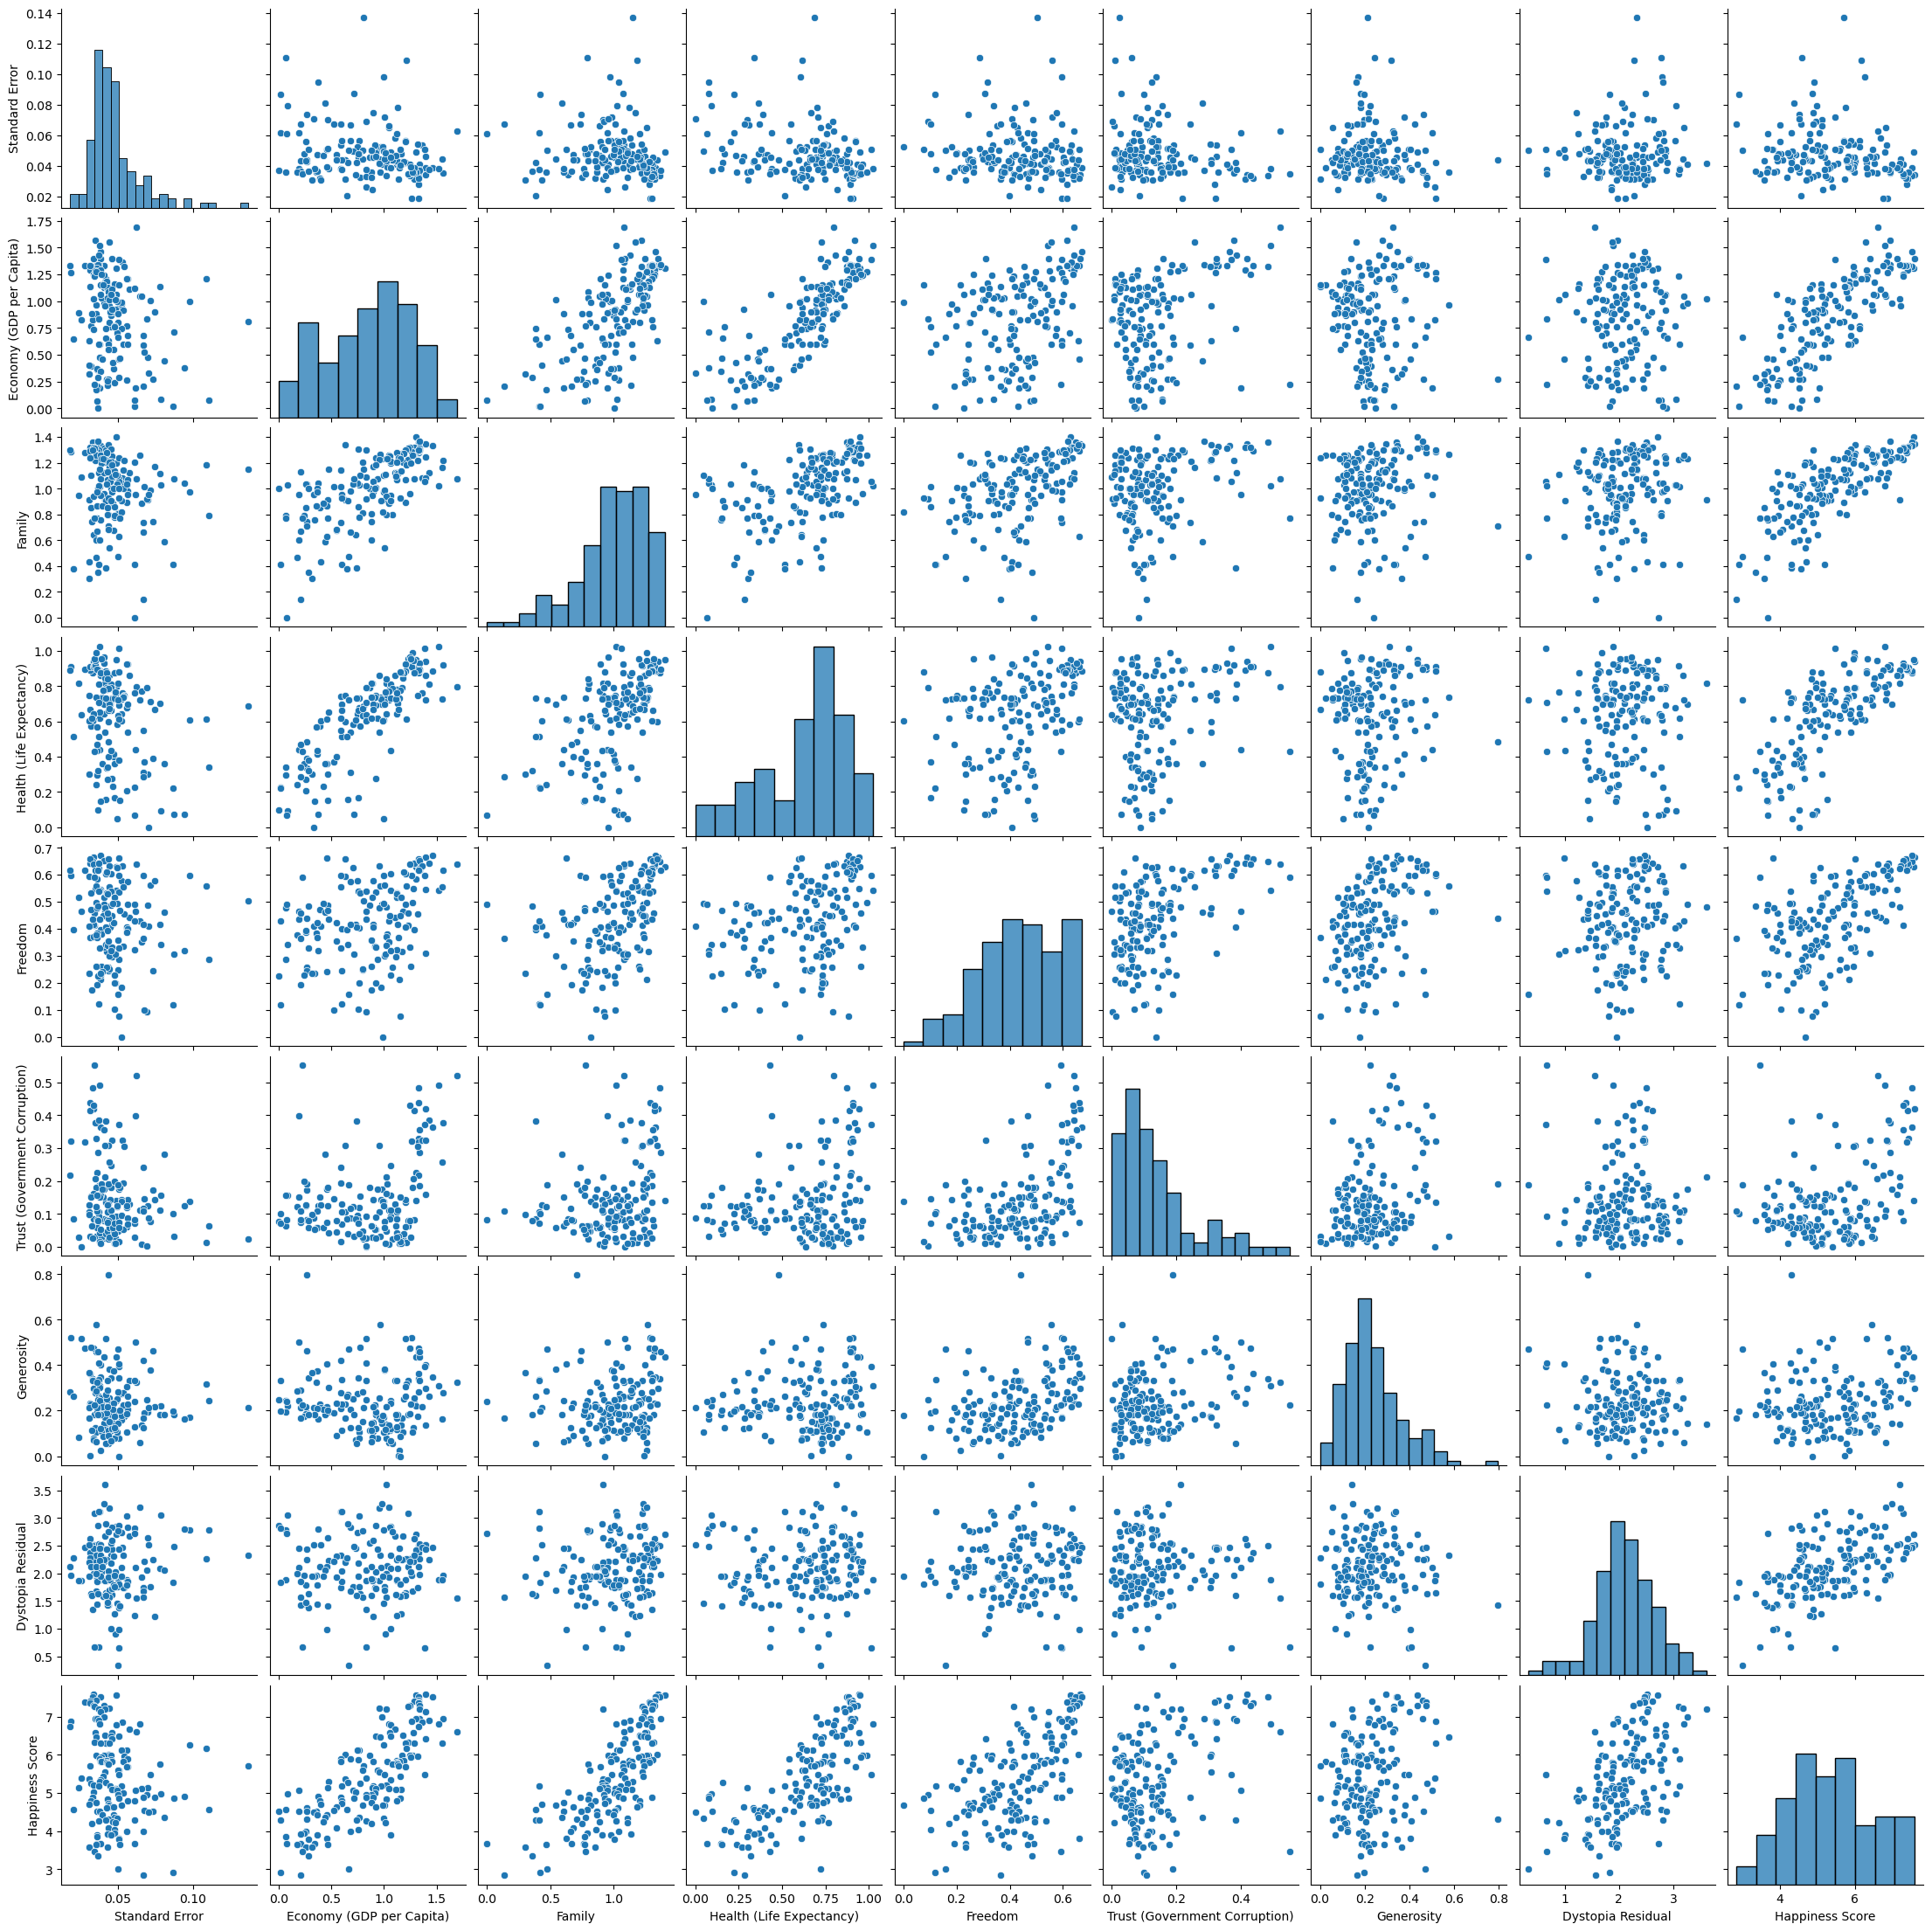

In [17]:
data_for_scatter=pd.concat([df[numeric_features],df[target]],axis=1)
sns.pairplot(data_for_scatter)
plt.show()

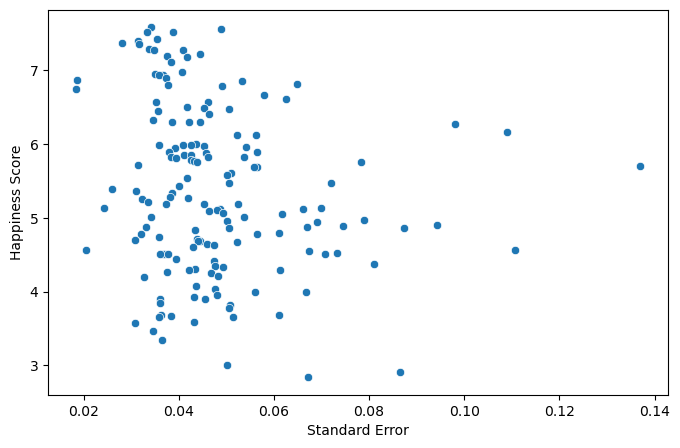

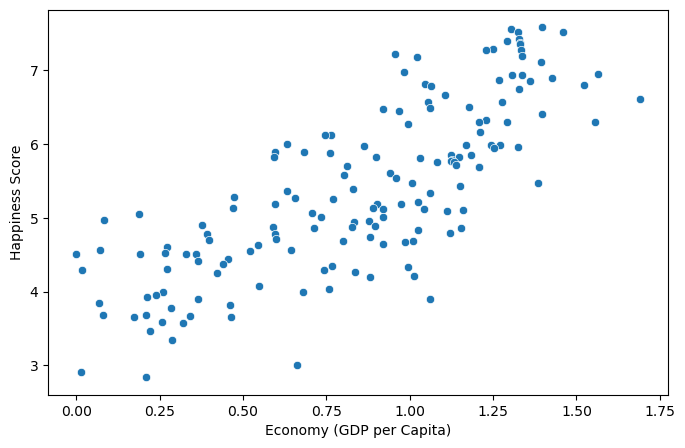

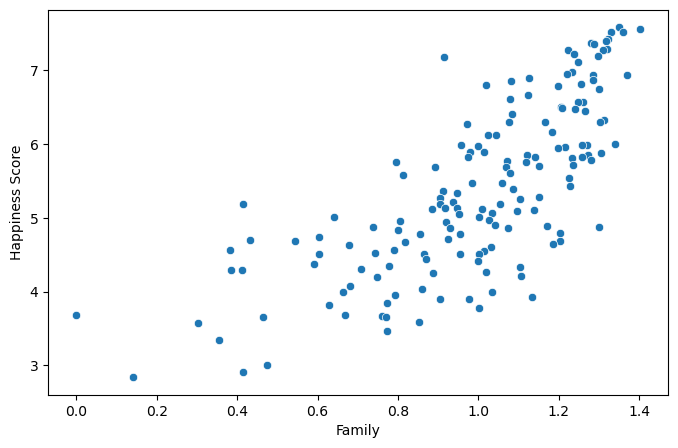

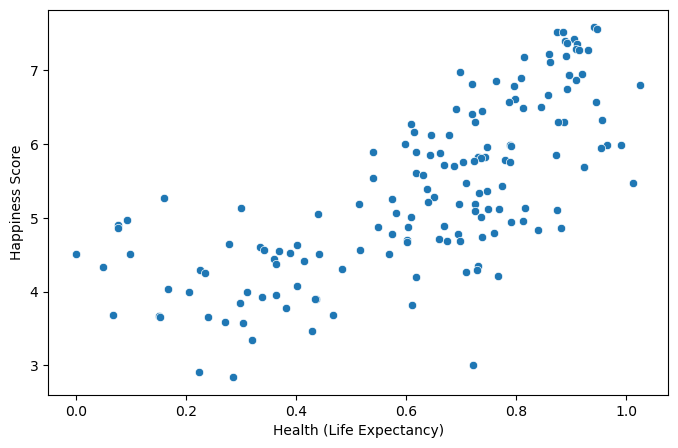

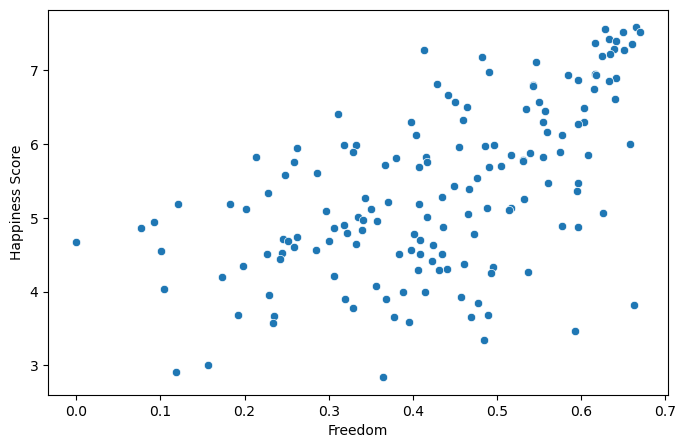

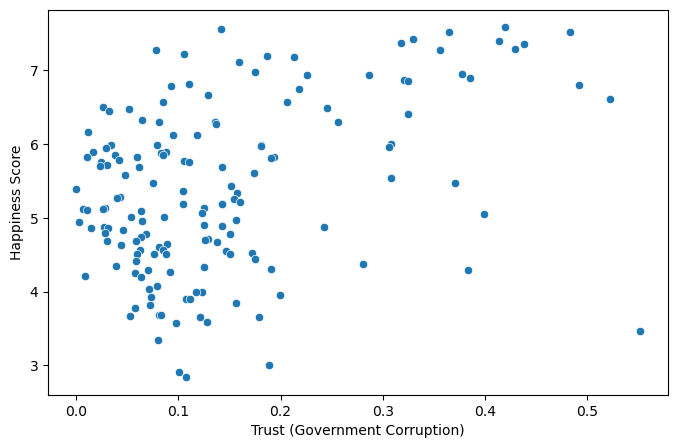

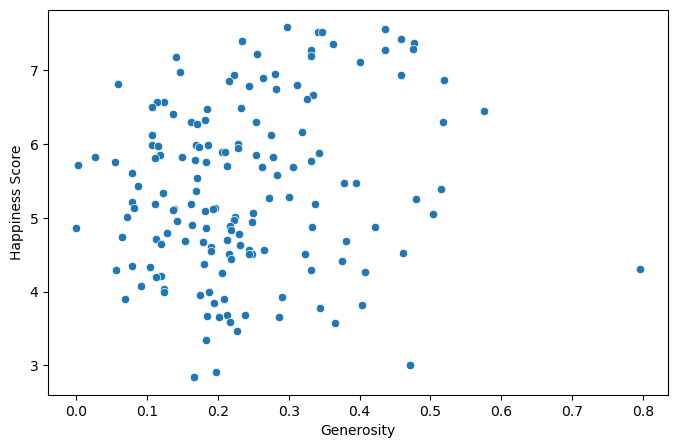

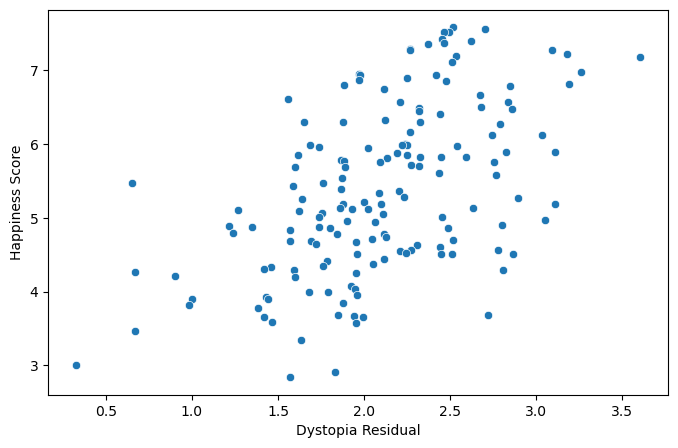

In [18]:
for k in numeric_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=k,y=df["Happiness Score"],data=df)
    plt.show()

In [22]:
for column in numeric_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  

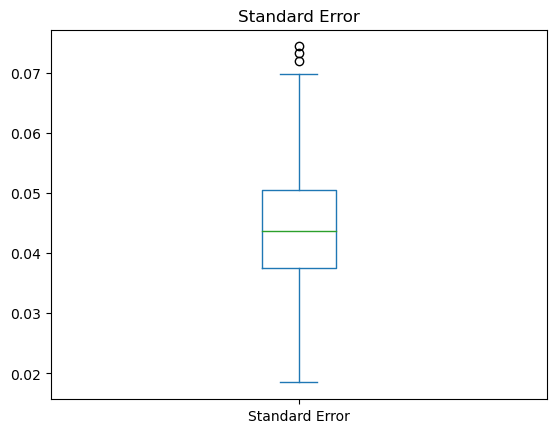

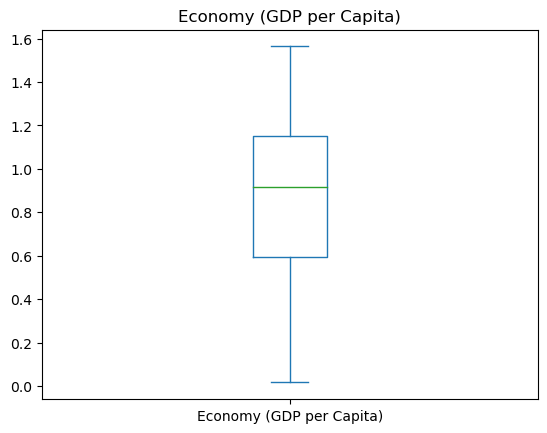

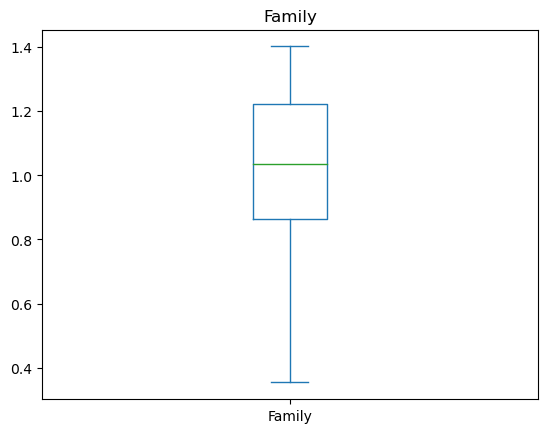

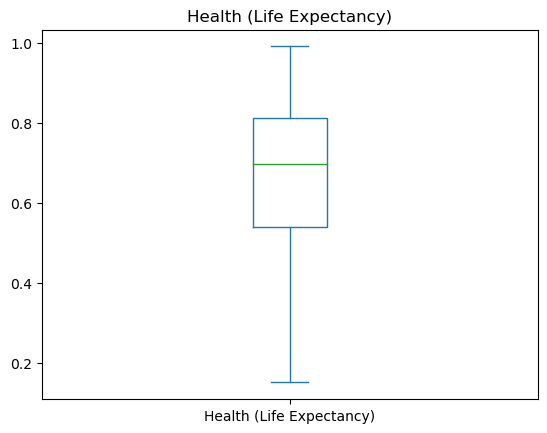

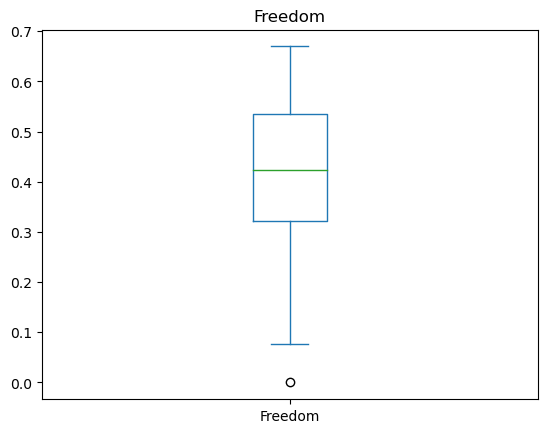

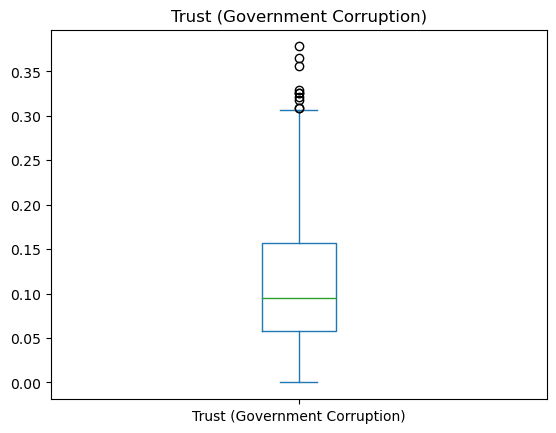

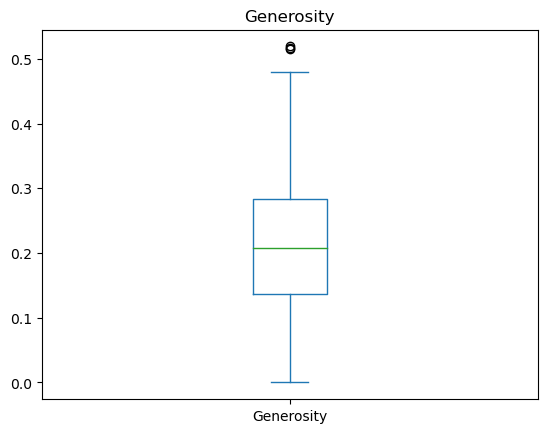

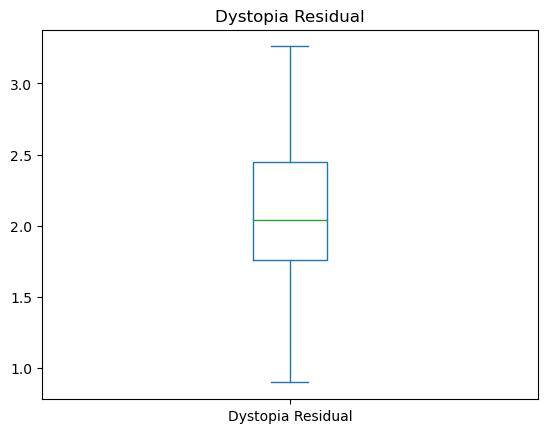

In [23]:
for x in numeric_features:
    df[x].plot(kind='box')
    plt.title(x)
    plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        125 non-null    object 
 1   Region                         125 non-null    object 
 2   Happiness Rank                 125 non-null    int64  
 3   Happiness Score                125 non-null    float64
 4   Standard Error                 125 non-null    float64
 5   Economy (GDP per Capita)       125 non-null    float64
 6   Family                         125 non-null    float64
 7   Health (Life Expectancy)       125 non-null    float64
 8   Freedom                        125 non-null    float64
 9   Trust (Government Corruption)  125 non-null    float64
 10  Generosity                     125 non-null    float64
 11  Dystopia Residual              125 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 12.7+ 

In [32]:
x=df.drop(columns=["Country","Happiness Rank","Happiness Score"])
y=df["Happiness Score"]

In [36]:
x=pd.get_dummies(x,columns=["Region",])

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
59,0.04263,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759,1.86565,False,True,False,False,False,False,False,False,False,False
77,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319,False,False,False,False,False,False,False,False,True,False
37,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323,False,False,True,False,False,False,False,False,False,False
118,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173,False,False,False,True,False,False,False,False,False,False
17,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173,False,False,False,False,False,False,True,False,False,False
57,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450,False,False,False,True,False,False,False,False,False,False
140,0.04317,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766,False,False,False,False,False,False,False,False,True,False
47,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942,False,False,False,True,False,False,False,False,False,False


In [42]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
models={
"RandomForestRegressor":RandomForestRegressor(),
"DecisionTreeRegressor":DecisionTreeRegressor()
}

In [46]:
for names,model in models.items():
    md=model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print(names,"=",mse)


RandomForestRegressor = 0.11171053634400029
DecisionTreeRegressor = 0.5974717999999999


In [45]:
from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.linear_model import Lasso,Ridge

In [56]:
lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso_score = lasso.score(x_test, y_test)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f'Lasso Regression Score: {lasso_score}')
print(f'Lasso Regression RMSE: {lasso_rmse}')

Lasso Regression Score: 0.7604700813459815
Lasso Regression RMSE: 0.5258101706056714


In [55]:
ridge = Ridge(alpha=0.1) 
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
ridge_score = ridge.score(x_test, y_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f'Ridge Regression Score: {ridge_score}')
print(f'Ridge Regression RMSE: {ridge_rmse}')

Ridge Regression Score: 0.9996052061106352
Ridge Regression RMSE: 0.021346875137186774


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, hyperparameters, cv=5)
clf.fit(x_train, y_train)
best_params = clf.best_params_


In [59]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [60]:
rfh = RandomForestRegressor(

max_depth = 10,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

rfh.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [61]:
import pickle

with open('happiness_score1.pkl', 'wb') as file:
    pickle.dump(rfh, file)

with open('happiness_score1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)